At a basic level, I think of directed graphs as where the nodes are connected with arrows indicating relationships that may or may not rely on each other.

In this way, it could be used to represent a social network where not everyone follows everyone else, or a few users are followed by everyone.



In [2]:
import networkx as nx
import logging
import pandas as pd

In [4]:
#create log file
logging.basicConfig(filename="directed-graphs.log",level=10)

The relationships I'd like to model are between the scientific classification of the phylum Chordata (chordates).  I am no biologist, so I have used [Wikipedia](https://en.wikipedia.org/wiki/Chordate) for this information.

Currently, apart from grouping organisms into the traditional hierarchy of Domain-Kingdom-Phylum-Class-Order-Family-Genus-Species, clades are an alternate way to group, so the information in the graph will be the following:

In [15]:
taxonomy = [["domain","Eukaryota"],["kingdom","Animalia"],["subkingdom","Eumetazoa"],
            ["clade","ParaHoxozoa"],["clade","Bilateria"],["superphylum","Deuterostomia"],
            ["phylum","Chordata"],["subphylum","Cephalochordata"],["clade","Olfactores"],
            ["subphylum","Vertebrata"],["subphylum","Tunicata"]]
groupdf = pd.DataFrame(data=taxonomy, columns=["Rank","Name"])
groupdf

,Rank,Name
0,domain,Eukaryota
1,kingdom,Animalia
2,subkingdom,Eumetazoa
3,clade,ParaHoxozoa
4,clade,Bilateria
5,superphylum,Deuterostomia
6,phylum,Chordata
7,subphylum,Cephalochordata
8,clade,Olfactores
9,subphylum,Vertebrata


I will put these into a graph where arrows are mutual for the same rank, but go one way between ranks.

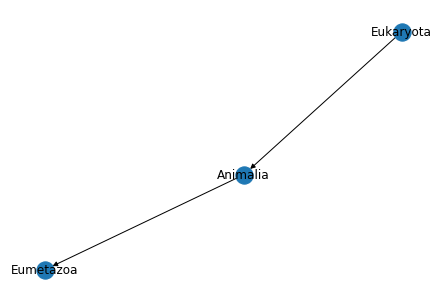

In [17]:
#create graph
dirG = nx.DiGraph()

#add nodes and edges for first three ranks
dirG.add_edges_from([(groupdf.iloc[0,1],groupdf.iloc[1,1]),(groupdf.iloc[1,1],groupdf.iloc[2,1])])
nx.draw(dirG, with_labels=True)